# 기계학습

### 담당교수 : 장원중

In [12]:
# 그래프 한글이 깨질때 & 마이너스 부호 사용

import matplotlib.pyplot as plt

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [2]:
# 운영체제별 이름

import platform

platform.system()

'Linux'

In [3]:
# 파이썬 버전 확인

import sys
import platform

print("--sys.version—")
print(sys.version)

print("--python_version—")
print(platform.python_version())

--sys.version—
3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
--python_version—
3.10.12


In [4]:
# 내 구글 드라이브에 연동

# from google.colab import drive

# drive.mount('/content/gdrive')

# 계층적 군집 분석 실습(1)

##  임의로 생성한 데이터로 계층적 클러스터링

In [ ]:
#  [계층 군집(Hierarchical clustering)]
#
#   - 덴드로그램(Dendrogram)을 그릴 수 있음
#      * 의미 있는 분류 체계를 만들어줌 → 군집 결과 이해, 설명에 적합하다.
#
#   - 클러스터의 수를 미리 정하지 않아도 된다.
#
#   - 병합형(응집형) 계층 군집(Agglomerative hierarchical clustering)
#     * 클러스터 당 하나의 데이터에서 시작하여, 모든 데이터가 하나의 클러스터에 속할 때까지 가장 가까운 클러스터를 병합해 나간다.
#       - 단일 연결
#         (1) 클러스터 쌍에서 가장 비슷한, 즉 가장 가까운 데이터 간의 거리를 계산
#         (2) 거리의 값이 가장 작은 두 클러스터를 하나로 합침
#       - 완전 연결
#         (1) 클러스터 쌍에서 가장 비슷하지 않은, 즉 가장 멀리 있는 데이터를 찾아 거리를 계산
#         (2) 가장 가까운 두 클러스터를 합침
#       - 평균 연결 : 두 클러스터에 있는 모든 샘플 사이의 평균 거리가 가장 작은 클러스터 쌍을 합침
#       - 와드 연결 : 클러스터 내 SSE가 가장 작게 증가하는 두 클러스터를 합침
#
#   - 분할적(분리형) 계층 군집(Divisive hierarchical clustering)
#     * 전체 데이터를 포함하는 하나의 클러스터에서 시작해, 클러스터 속 데이터가 하나가 남을 때까지 반복적으로 클러스터를 나눔

In [ ]:
# 병합적(응집형) 계층 군집 : 완전 연결
#
# 진행 과정
# (1) 모든 데이터의 거리행렬을 계산
# (2) 모든 데이터 포인트를 단일 클러스터로 표현
# (3) 가장 비슷하지 않은, 즉 멀리 떨어진 데이터 간 거리에 기초하여 가장 가까운 두 클러스터를 하나로 합침
# (4) 유사도 행렬 업데이트
# (5) 하나의 클러스터가 남을 때 까지 2~4단계 반복

In [9]:
# 라이브러리 읽어오기

from scipy.spatial.distance import pdist, squareform
import numpy as np
import pandas as pd

In [30]:
# 무작위 데이터 생성

np.random.seed(123)                                 # 시드 설정
X = np.random.random_sample([5, 3]) * 10            # 무작위 함수를 통해 5*3 행렬 생성
print(X.shape)  # (5, 3)
print(X)
#[[6.96469186 2.86139335 2.26851454]
# [5.51314769 7.1946897  4.2310646 ]
# [9.80764198 6.84829739 4.80931901]
# [3.92117518 3.43178016 7.29049707]
# [4.38572245 0.59677897 3.98044255]]

(5, 3)
[[6.96469186 2.86139335 2.26851454]
 [5.51314769 7.1946897  4.2310646 ]
 [9.80764198 6.84829739 4.80931901]
 [3.92117518 3.43178016 7.29049707]
 [4.38572245 0.59677897 3.98044255]]


In [31]:
# 생성된 데이터를 데이터 프레임에 저장

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [32]:
# scipy.spatial.distance.pdist() 함수는 주어진 점들 사이의 모든 거리를 계산한다.
#  - d = squareform(pdist(x, 'euclidean'))

# pdist() : 축약된 거리행렬

distmatrix = pdist(df, metric='euclidean')  # 두 점 사이의 유클리드 거리 계산
print(distmatrix.shape)                     # (10,)
print(distmatrix)
# [4.973534   5.51665266 5.89988504 3.83539555 4.34707339 5.10431109 6.69823298 7.24426159 8.31659367 4.382864]

(10,)
[4.973534   5.51665266 5.89988504 3.83539555 4.34707339 5.10431109
 6.69823298 7.24426159 8.31659367 4.382864  ]


In [33]:
# scipy.spatial.distance.squareform() 함수는 거리행렬 벡터를 행렬형식으로 변환한다.

# 두점 사이 거리 계산값 출력
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist
# row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels)
print(row_dist.shape)   # (5, 5)
print(row_dist)
#          ID_0      ID_1      ID_2      ID_3      ID_4
#ID_0  0.000000  4.973534  5.516653  5.899885  3.835396
#ID_1  4.973534  0.000000  4.347073  5.104311  6.698233
#ID_2  5.516653  4.347073  0.000000  7.244262  8.316594
#ID_3  5.899885  5.104311  7.244262  0.000000  4.382864
#ID_4  3.835396  6.698233  8.316594  4.382864  0.000000

(5, 5)
          ID_0      ID_1      ID_2      ID_3      ID_4
ID_0  0.000000  4.973534  5.516653  5.899885  3.835396
ID_1  4.973534  0.000000  4.347073  5.104311  6.698233
ID_2  5.516653  4.347073  0.000000  7.244262  8.316594
ID_3  5.899885  5.104311  7.244262  0.000000  4.382864
ID_4  3.835396  6.698233  8.316594  4.382864  0.000000


In [34]:
# linkage(): 계층적 클러스터링 수행(여기서는 병합적(응집형) 계층적 클러스터링을 수행)

# linkage : pdist() 함수에서 축약된 거리행렬을 입력 속성으로 사용

from scipy.cluster.hierarchy import linkage

# 완전연결(complete linkage)을 이용한 계층적 클러스터링
# row_clusters = linkage(distmatrix, method='complete')
# row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

# linkage() 함수에서 초기 데이터 배열을 전달하고, euclidean 지표를 매개변수로 사용
#  - 완전연결(complete linkage) 방식으로 군집
row_clusters = linkage(df.values, metric='euclidean', method='complete')
print(row_clusters)

# 군집 결과를 데이터프레임 형태로 반환
# pd.DataFrame(row_clusters,
#              columns = ['row label 1', 'row label 2', 'distance', 'no. of items in cluster'],
#              index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
pd.DataFrame(row_clusters,
             columns=['군집ID_1', '군집ID_2', '거리', '군집 멤버수'],
             index=['군집 %d' % (i+1) for i in range(row_clusters.shape[0])])
#
#  군집ID_1, 군집ID_2 : 각 클러스터에서 완전연결방식으로 병합(응집)된 클러스터를 나타낸다.
#
# 거리(distance): 군집 간의 거리이다.
#
# 군집 멤버수는 군집에 속한 데이터의 수이다.
#  - 군집1 : ID_0, ID_4 → 2개
#  - 군집2 : ID_1, ID_2 → 2개
#  - 군집3 : ID_0, ID_4, ID_3 → 3개
#  - 군집4 : ID_1, ID_2, ID_3, ID_0, ID_4 → 5개
#
# 군집 결과 해석:
#  - 무작위 생성 데이터 5개 → 4개의 클러스터로 군집화한다.
#  - 군집1의 경우, ID_0과 ID_4가 응집(병합)됨 → 이게 ID_5가 되는 것이다.
#  - 군집2의 경우, ID_1과 ID_2가 응집(병합)됨 → 이게 ID_6이 되는 것이다.
#  - 군집3의 경우, ID_3과 ID_5(ID_0 + ID_4)가 응집(병합)됨 → ID_7이 되는 것이다.
#  - 군집4의 경우, ID_6(ID_1 + ID_2)과 ID_7(ID_3 + (ID_0 + ID_4))가 병합된 것이다.


[[0.         4.         3.83539555 2.        ]
 [1.         2.         4.34707339 2.        ]
 [3.         5.         5.89988504 3.        ]
 [6.         7.         8.31659367 5.        ]]


,군집ID_1,군집ID_2,거리,군집 멤버수
군집 1,0.0,4.0,3.835396,2.0
군집 2,1.0,2.0,4.347073,2.0
군집 3,3.0,5.0,5.899885,3.0
군집 4,6.0,7.0,8.316594,5.0


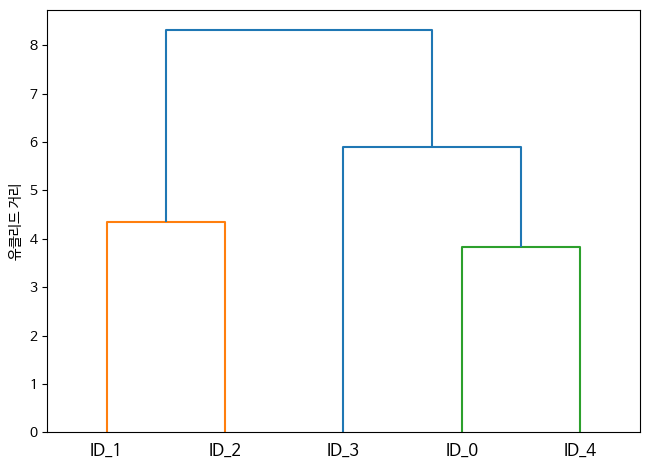

In [35]:
# dendrogram() : 클러스터의 계층 구조를 표현

# 덴드로그램 그리기

# 계층 군집(Hierarchical clustering)
#  - 덴드로그램(Dendrogram)을 그릴 수 있다.
#  - 의미 있는 분류 체계를 만들어줌 → 군집 결과 이해, 설명에 적합하다.

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendrogram = dendrogram(row_clusters, labels=labels)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()

# 계층적 군집 분석 실습(2)

## 병합적(응집형) 군집(agglomerative clustering) 알고리즘 예시

In [3]:
# mglearn 라이브러리 설치하기

!pip3 install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.8 MB/s eta 0:00:00


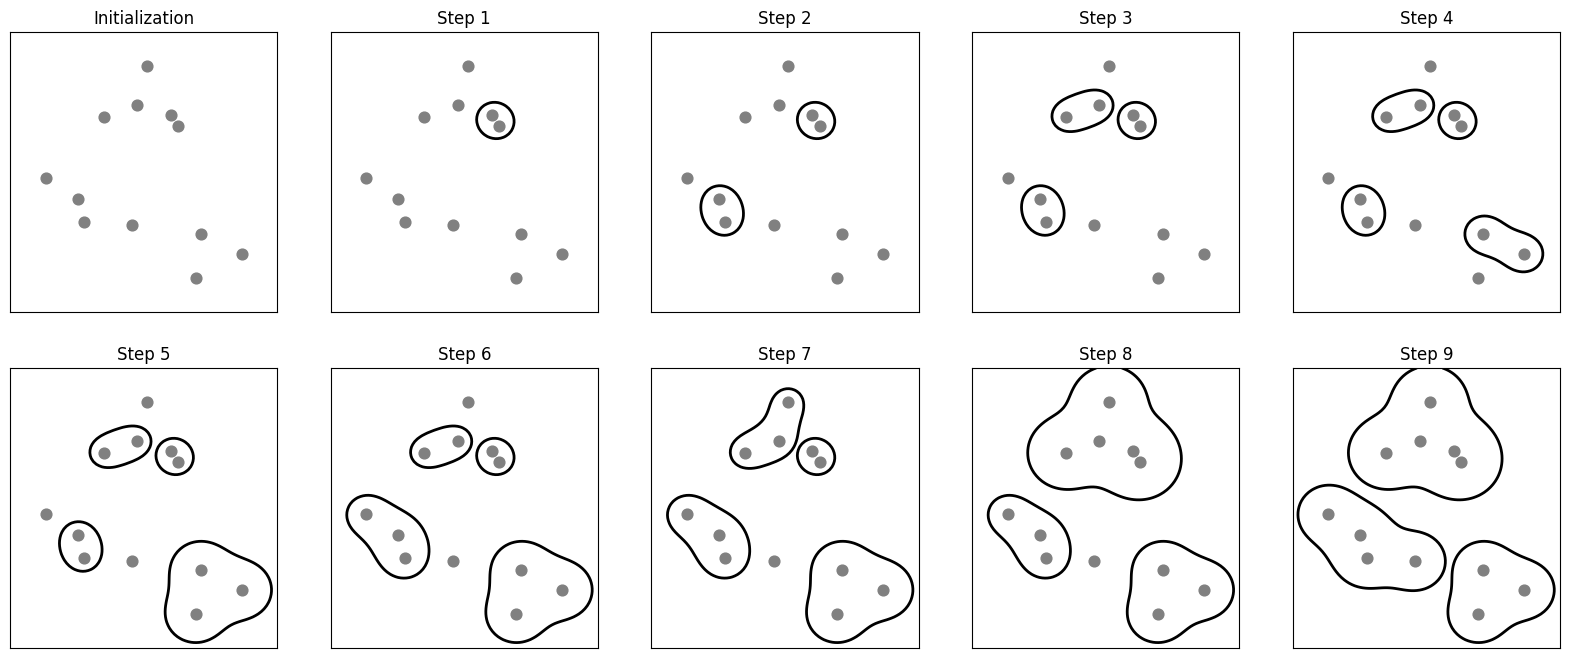

In [4]:
# 병합적(Agglomerative) : Bottorm-up

# 병합적(응집형) 군집(agglomerative clustering) 알고리즘 :
#   - 시작할 때 각 포인트를 하나의 클러스터로 지정
#   - 특정 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합친다.
#   - 종료조건 : 클러스터 갯수, 지정된 갯수의 클러스터가 남을 때까지 비슷한 클러스터를 합친다.

# linkage: 옵션에서 가장 비슷한 클러스터를 측정하는 방법 지정, 이 측정은 항상 두 클러스터 사이에서 이뤄진다.
# ward : 기본값, 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침, 크기가 비교적 비슷한 클러스터가 만들어진다.
# average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.
# complete : complete 연결(최대 연결)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다.

# ward가 대부분의 데이터셋에 알맞다.
# 클러스터에 속한 포인트 수가 많이 다를 땐 average나 complete가 나을 수 있다.

# 다음은 2차원 데이터셋에서 세 개의 클러스터를 찾기 위한 병합적(응집형) 군집의 과정이다.

# 라이브러리 읽어오기
import mglearn
import matplotlib
import matplotlib.pyplot as plt

# 알고리즘 설명 시각화
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

## 임의적으로 생성된 분류 데이터로 병합적(응집형) 군집

(100, 2) (100,)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'feature 1')

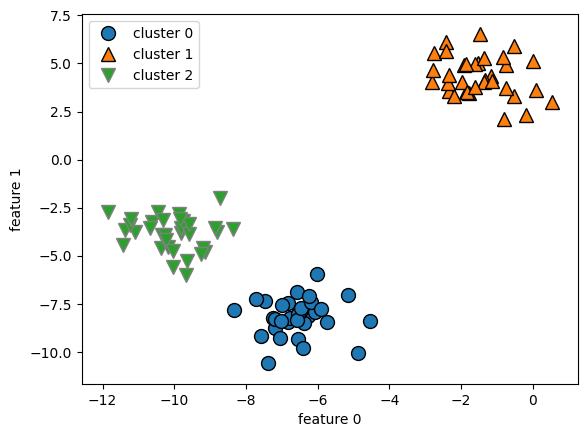

In [5]:
# make_blobs() : 모든 방향으로 같은 성질을 가지는 정규분포를 이용해 가상 데이터 생성 클러스링하는 용도로 사용
# make_blobs 함수의 인수, 반환값
#  1. 인수
#   - n_samples, n_features, centers, cluster_std, center_box
#   - n_samples : 표본 데이터 수, 기본값 100
#   - n_features : 독립 변수 수, 기본값 2
#   - centers : 클러스터 수 혹은 중심, 기본값 3
#   - cluster_std: 클러스터 표준 편차, 기본값 1.0
#   - center_box: 클러스터 바운딩 박스(bounding box), 기본값 (-10.0, 10.0))
# 2. 반환값
#   - X : [n_samples, n_features] 크기의 배열
#   - y : [n_samples] 크기의 배열

# 알고리즘 작동 특성상 병합적(응집형) 군집은 새로운 데이터 포인트에 대해서는 예측을 할 수 없다.
#  - 그러므로 병합적(응집형) 군집은 predict 메서드가 없다.
#  - 그래서 클러스터를 만들고 소속 정보를 얻기 위해 fit_predict() 메서드를 사용한다.

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
print(X.shape, y.shape)       # (100, 2) (100,)

# 완전연결방식, n_clusters=3
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc="best")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

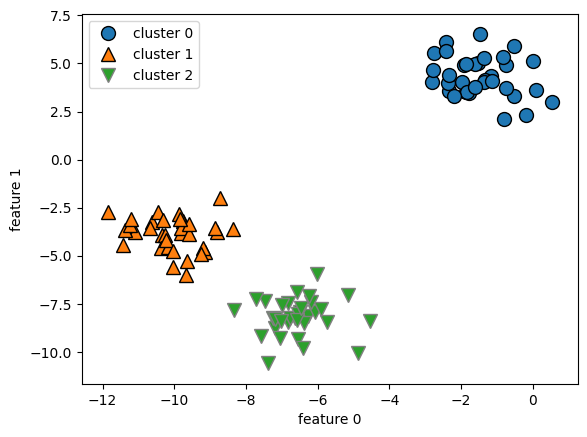

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc="best")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [10]:
d = {'assignment':assignment, 'Actual':y}
pd.DataFrame(data=d,index=['idx%d' % (i+1) for i in range(assignment.shape[0])])

,assignment,Actual
idx1,1,0
idx2,2,1
idx3,2,1
idx4,2,1
idx5,0,2
...,...,...
idx96,0,2
idx97,0,2
idx98,1,0
idx99,0,2


<ipython-input-11-8290b94df5e7>:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:, 0], X[:, 1], marker='x', c=y, s=30, edgecolor="k", linewidth=2)


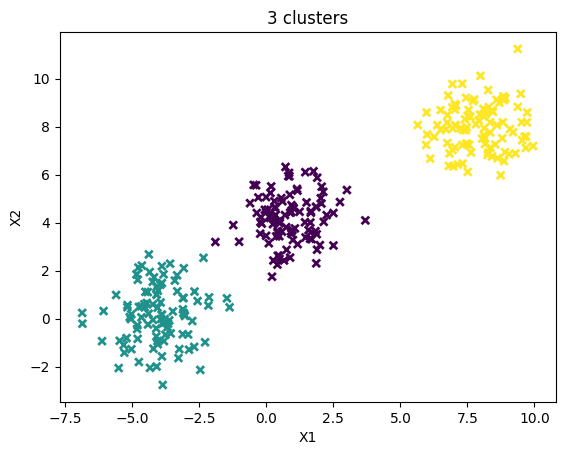

In [11]:
#  make_blobs으로 300개의 데이터를 생성하고, 산포도로 그려보자.
#  - n_samples  : 300개의 표본
#  - n_features : 2개 독립변수
#  - centers : 3개 클러스터
#  - random_state : 3

from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=3)

plt.title("3 clusters")
plt.scatter(X[:, 0], X[:, 1], marker='x', c=y, s=30, edgecolor="k", linewidth=2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# 계층적 군집 분석 실습(3)

## 아이리스 데이터로 병합적(응집형) 군집

In [12]:
# 라이브러리 읽어오기

from sklearn.datasets import load_iris
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [13]:
# iris 데이터셋 읽어오기
#  - data: Feature 데이터, Numpy의 배열(ndarray) 혹은 Pandas의 dataframe 형태
#  - target: Label 데이터, Numpy의 배열(ndarray) 혹은 Pandas의 Series 형태
#  - feature_names: Feature 데이터의 이름, 리스트
#  - target_names: Label 데이터의 이름, 리스트
#  - DESCR: 데이터 셋의 설명, 문자열
#  - filename: 데이터 셋의 파일 저장 위치 (csv), 문자열

iris = load_iris()

df = pd.DataFrame(iris.data, columns=['Sepal_length','Sepal_width','Petal_length','Petal_width'])
df['labels'] = iris.target
df

,Sepal_length,Sepal_width,Petal_length,Petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


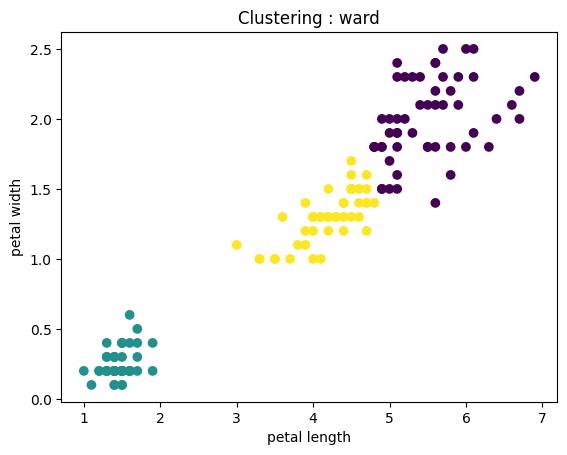

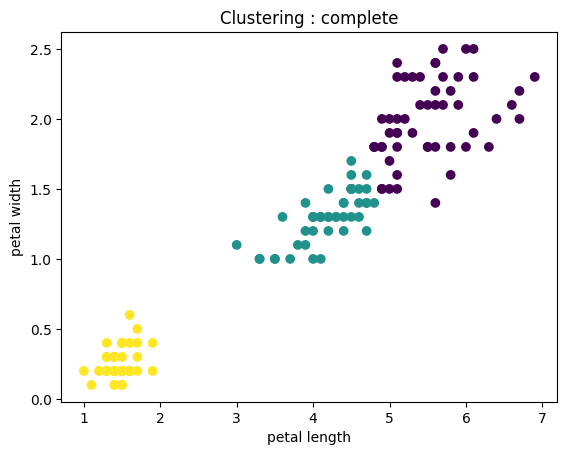

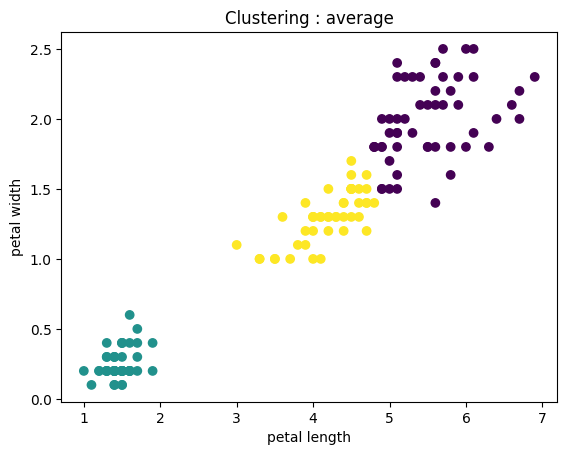

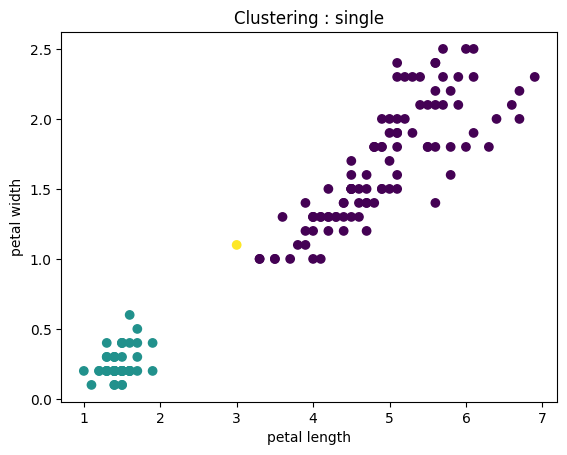

In [15]:
# iris 데이터셋으로  Ward, 완전(최장), 평균, 단일(최단) 연결법으로 산점도를 그리는 코드이다.

# linkage: 옵션에서 가장 비슷한 클러스터를 측정하는 방법 지정, 이 측정은 항상 두 클러스터 사이에서 이뤄진다.
# ward : 기본값, 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침, 크기가 비교적 비슷한 클러스터가 만들어진다.
# average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.
# complete : complete 연결(최대 연결)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다.

# ward가 대부분의 데이터셋에 알맞다.
# 클러스터에 속한 포인트 수가 많이 다를 땐 average나 complete가 나을 수 있다.

from sklearn.cluster import AgglomerativeClustering

linkage = ['ward', 'complete', 'average', 'single']

for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=i)
    hier.fit(df.iloc[:, 2:4])       # 'petal length'와 'petal width' column을 사용해 학습
    plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=hier.labels_)
    plt.title('Clustering : ' + i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')

plt.show()

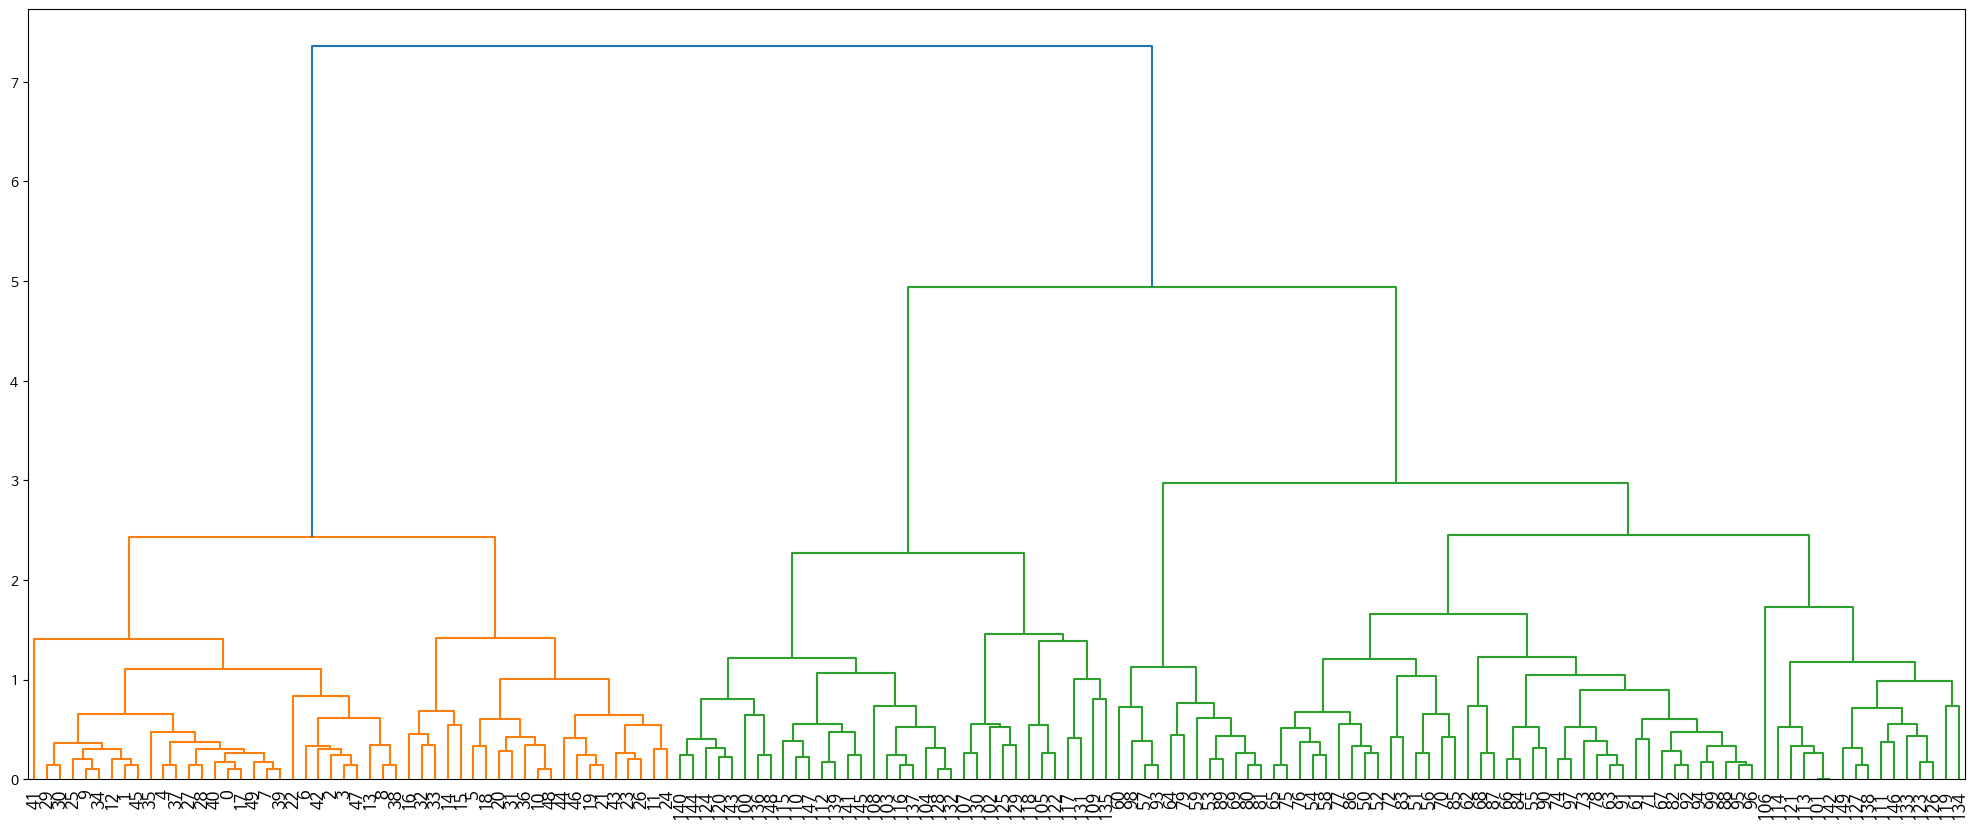

In [19]:
# 계층적 군집 실행

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

clustering = linkage(df, method='complete')   # 완전 연결방식
# clustering = linkage(df.iloc[:, 2:4], method='complete')   # 완전 연결방식
plt.figure(figsize=(25,10))

# 덴드로그램으로 표현
#  - leaf_rotation=90 : 글자 각도
#  - leaf_font_size=20 : 글자 사이즈
dendrogram(clustering, leaf_rotation=90, leaf_font_size=12)
plt.show()

In [20]:
# Calculate the linkage: mergings

mergings = linkage(df, method='complete')   # 완전 연결방식

In [21]:
# fcluster() : 지정한 클러스터 자르기
#  - fcluster 함수를 이용하면, 특정 y값에서 클러스터링를 자를 수 있다.

y_predict = fcluster(mergings, t=3, criterion='distance')
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [22]:
predict = pd.DataFrame(y_predict-1, columns=['predict'])  # 예측값과 실제값 레이블 통일
predict

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,2
147,1
148,1


In [23]:
# pd.crosstab() 사용해 교차표(cross tabulation)
#  - crosstab()은 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용한다.
#  - 세로축이 예측 결과, 가로측이 원래 값이다.

# array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 정오분류표를 이용해 실제값과 예측값을 비교해 보자.

cro_tbl = pd.crosstab(df['labels'], predict['predict'])
print(cro_tbl)

predict   0   1   2
labels             
0        50   0   0
1         0   0  50
2         0  34  16


In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(df['labels'], predict['predict'])
confusion_matrix

array([[50,  0,  0],
       [ 0,  0, 50],
       [ 0, 34, 16]])

<ipython-input-25-5f140de964ae>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):


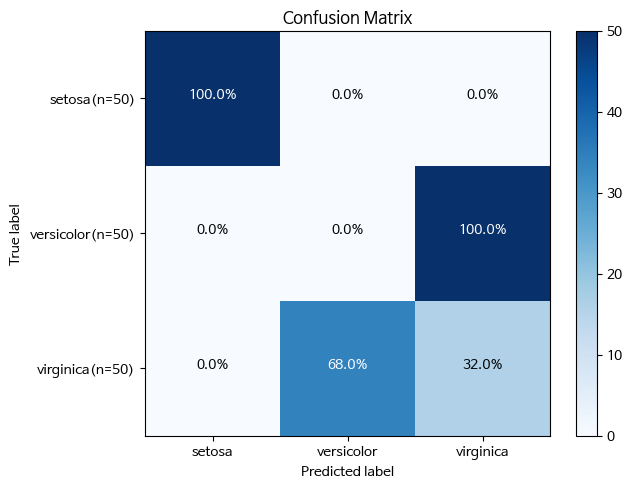

In [25]:
import itertools

# 정오분류표 시각화 함수 정의하기
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

labels = ['setosa', 'versicolor', 'virginica']
plot_confusion_matrix(confusion_matrix, labels=labels, normalize=True)

Text(0, 0.5, 'Petal width')

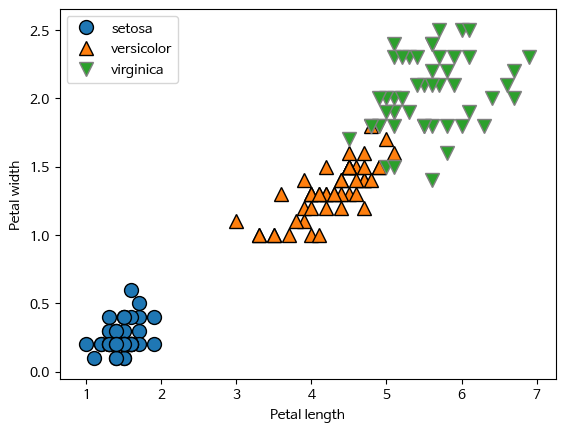

In [26]:
# iris 원본 데이터의 산점도
#  - 'petal length'와 'petal width' column을 사용

from sklearn.cluster import AgglomerativeClustering

# array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
mglearn.discrete_scatter(df.iloc[:, 2], df.iloc[:, 3], df.iloc[:, 4])
plt.legend(["setosa", "versicolor", "virginica"], loc="best")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'Petal width')

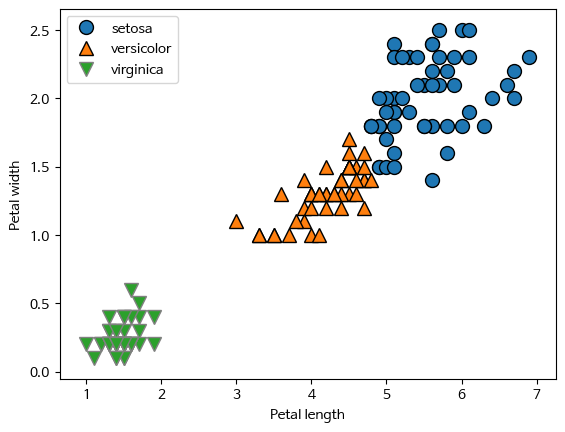

In [27]:
# iris 예측 데이터의 산점도
#  - 'petal length'와 'petal width' column을 사용

from sklearn.cluster import AgglomerativeClustering

# n_clusters : 3 클러스터
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
assignment = agg.fit_predict(df.iloc[:, 2:4])  # 'petal length'와 'petal width' column을 사용해 학습

# array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
mglearn.discrete_scatter(df.iloc[:, 2], df.iloc[:, 3], assignment)
plt.legend(["setosa", "versicolor", "virginica"], loc="best")
plt.xlabel("Petal length")
plt.ylabel("Petal width")